In [1]:
import cv2
import argparse
import imutils
import time
import scipy.io
# from sklearn.svm import SVC
import skvideo.io
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.manifold import LocallyLinearEmbedding
from scipy.ndimage import morphology as mp
from skimage.feature import canny
# from thundersvm import SVC
from sklearn import linear_model
from random import sample
import matplotlib.patches as patches
from PIL import Image
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction import image
from random import shuffle
import numpy as np
import matplotlib.pyplot as plt
import mahotas
from imutils.video import VideoStream
from imutils.video import FPS
import os
import pickle
import copy

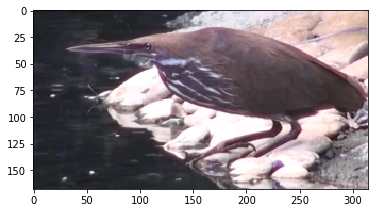

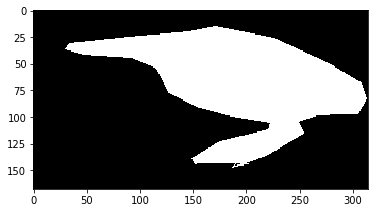

In [40]:
label=22
basepath = "training/"+str(label)+"/"
loadpath = basepath+"train/"
img = cv2.imread(loadpath+'frame.png');
# img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# img=img[:,:,0]
sil = cv2.imread(loadpath+'gt.png');
# sil = cv2.cvtColor(sil, cv2.COLOR_BGR2HSV)
# sil=sil[:,:,0]
# [m,n] = img.shape
# [m1,n1] = sil.shape
# a=0
# b=0
# if(m1<m):
#     a = m 
plt.imshow(img),plt.show();
plt.imshow(sil*255),plt.show();
# cv2.imshow("Img",img);
# cv2.imshow("Sil",sil);
# cv2.waitKey(0)
# cv2.destroyAllWindows()

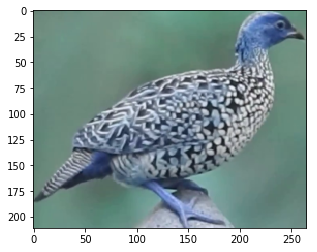

In [14]:
sil_gray = cv2.cvtColor(sil, cv2.COLOR_BGR2GRAY)
i, j = np.where(sil_gray)
indices = np.meshgrid(np.arange(min(i), max(i) + 1),
                      np.arange(min(j), max(j) + 1),
                      indexing='ij')
sub_image = img[indices]
plt.imshow(sub_image),plt.show();

In [15]:
indices

[array([[ 23,  23,  23, ...,  23,  23,  23],
        [ 24,  24,  24, ...,  24,  24,  24],
        [ 25,  25,  25, ...,  25,  25,  25],
        ...,
        [231, 231, 231, ..., 231, 231, 231],
        [232, 232, 232, ..., 232, 232, 232],
        [233, 233, 233, ..., 233, 233, 233]]),
 array([[ 49,  50,  51, ..., 311, 312, 313],
        [ 49,  50,  51, ..., 311, 312, 313],
        [ 49,  50,  51, ..., 311, 312, 313],
        ...,
        [ 49,  50,  51, ..., 311, 312, 313],
        [ 49,  50,  51, ..., 311, 312, 313],
        [ 49,  50,  51, ..., 311, 312, 313]])]

In [16]:
x1,y1 = indices[0][0,0],indices[1][0,0]

In [17]:
x1,y1

(23, 49)

In [18]:
x2,y2 = indices[0][indices[0].shape[0]-1,indices[0].shape[1]-1],indices[1][indices[1].shape[0]-1,indices[1].shape[1]-1]

In [19]:
x2,y2

(233, 313)

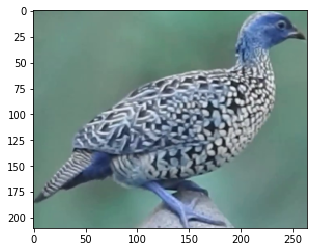

In [20]:
sub_image = []
sub_image = img[x1:x2,y1:y2]
plt.imshow(sub_image),plt.show();

In [41]:
# im = img[0:8,0:8]
patches=[]
GT=[]
psize=8
patches = image.extract_patches_2d(img, (psize, psize))
GT = image.extract_patches_2d(sil, (psize, psize))
X=[]
Y=[]
i=0;
print("Total Patches:"+str(len(patches)));
while i < len(patches):
# for i in range(len(patches)):
    a = patches[i].flatten()
    if(np.count_nonzero(GT[i])>=(psize*psize/2)*3):
        Y.append(1)
    else:
        Y.append(0)

    X.append(a)
    i=i+1


Total Patches:49588


In [42]:
clf = linear_model.SGDClassifier(loss='modified_huber',learning_rate='adaptive',eta0=1e-8,epsilon=1e-6,max_iter=1000, tol=1e-5,n_jobs=-1)
clf.fit(X, Y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=1e-06, eta0=1e-08, fit_intercept=True,
       l1_ratio=0.15, learning_rate='adaptive', loss='modified_huber',
       max_iter=1000, n_iter=None, n_iter_no_change=5, n_jobs=-1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       tol=1e-05, validation_fraction=0.1, verbose=0, warm_start=False)

In [43]:
def trainVideo2(file,boxes,label,filename):
    vs = cv2.VideoCapture(file)
    
    # loop over frames from the video stream
    fno = 1
#     frame_array = []
    disp_flag=False
    capture=True
    next_frame=[]
    corners=[]
    img=[]
    storepath = 'output/'+str(label)+"/"
    nos = 100
    if not os.path.exists(storepath):
        os.mkdir(storepath)
#     fourcc = cv2.VideoWriter_fourcc(*'XVID')
#     fourcc = cv2.VideoWriter_fourcc('M','J','P','G')
    fname = filename.strip('.mp4')
#     out = cv2.VideoWriter(storepath+fname+'.avi',fourcc, 10.0, (400,500))
    writer = skvideo.io.FFmpegWriter(storepath+fname+"_"+str(nos)+".mp4")
#     out = cv2.VideoWriter(storepath+filename,0x00000021, 10, (400,500))
    
    def mouse_click(event,x,y,flags,param):
        if event == cv2.EVENT_LBUTTONDOWN:
            corners.append([x,y])
            for i in corners:
                [x,y] = i
                cv2.circle(cropped_im,(x,y),3,255,-1)

#     cv2.namedWindow('Frame')
#     cv2.setMouseCallback("Frame", mouse_click)
    track_window = (0,0,0,0)
    # set up the ROI for tracking
#     roi = None
#     hsv_roi =  None
#     mask = None
#     roi_hist = None
    track = False
#     # cv.normalize(roi_hist,roi_hist,0,255,cv.NORM_MINMAX)
#     # Setup the termination criteria, either 10 iteration or move by atleast 1 pt
#     term_crit = None
    
#     OPENCV_OBJECT_TRACKERS = {
#         "csrt": cv2.TrackerCSRT_create,
#         "kcf": cv2.TrackerKCF_create,
#         "boosting": cv2.TrackerBoosting_create,
#         "mil": cv2.TrackerMIL_create,
#         "tld": cv2.TrackerTLD_create,
#         "medianflow": cv2.TrackerMedianFlow_create,
#         "mosse": cv2.TrackerMOSSE_create
#     }

#     # grab the appropriate object tracker using our dictionary of
#     # OpenCV object tracker objects
#     tracker = OPENCV_OBJECT_TRACKERS["kcf"]()

    cur_no=0
    count = 1
    while True:
        # grab the current frame, then handle if we are using a
        # VideoStream or VideoCapture object
        frame1 = vs.read()
        frame = frame1[1] # if args.get("video", False) else frame1
        # frame = fgbg.apply(frame)

        # check to see if we have reached the end of the stream
        if frame is None:
            break

        # resize the frame (so we can process it faster) and grab the
        # frame dimensions
        frame = imutils.resize(frame, width=500)
        (H, W) = frame.shape[:2]

        # check to see if we are currently tracking an object
        if fno in boxes:
            (x1,y1,x2,y2) = boxes[fno]

            if x2<x1:
                temp=x2
                x2=x1
                x1=temp
            if y2<y1:
                temp=y2
                y2=y1
                y1=temp

            if x2>W:
                x2=W
            if y2>H:
                y2=H
            if x1<0:
                x1=0
            if y1<0:
                y1=0
            cropped_im = frame[y1:y2,x1:x2]
                
            # show the output frame
            key = cv2.waitKey(1) & 0xFF
            
#         # if the `q` key was pressed, break from the loop
            if key == ord("q"):
                break
            if key == ord('p'):
                img = copy.copy(cropped_im)
                while True:

                    key2 = cv2.waitKey(1) or 0xff
                    cv2.imshow('Frame',cropped_im)

                    if key2 == ord('p'):
                        disp_flag=True
                        break
            if disp_flag:

                mask = np.zeros((img.shape[0], img.shape[1]))
                cv2.fillConvexPoly(mask, np.array(corners), 1)
                cv2.imwrite('frame.png',img)
                cv2.imwrite('gt.png',mask)
#                 cv2.imshow("Mask:", mask)
                mask = mask.astype(np.bool)

                silhouette = np.zeros_like(img)
                silhouette[mask] = img[mask]
            
                 # delete zero columns
#                 silhouette= np.delete(silhouette,np.where(~silhouette.any(axis=0))[0], axis=1)
#                 # delete zero rows
#                 silhouette= np.delete(silhouette,np.where(~silhouette.any(axis=1))[0], axis=0)

                cv2.imwrite('extracted_silhouette.png',silhouette)
                disp_flag=False
                capture = True
#             [m,n,p] = cropped_im.shape
#             diff = 400 - m
#             top = int(diff/2)
#             bot = diff -top
#             diff = 500 - n
#             left = int(diff/2)
#             right = diff -left
#             constant= cv2.copyMakeBorder(cropped_im,top,bot,left,right,cv2.BORDER_CONSTANT,value=[0,0,0])
#             cv2.imshow("Frame", constant)
#             out.write(constant)
#             frame_array.append(constant)
            print("Frame:"+str(fno));
#             plt.imshow(cropped_im),plt.show();
            if(capture):
                next_img = predictSilhouette2(cropped_im)
                [m,n,p] = next_img.shape
                diff = 400 - m
                top = int(diff/2)
                bot = diff -top
                diff = 500 - n
                left = int(diff/2)
                right = diff -left
                padded_img= cv2.copyMakeBorder(next_img,top,bot,left,right,cv2.BORDER_CONSTANT,value=[0,0,0])
                padded_img = cv2.cvtColor(padded_img, cv2.COLOR_BGR2RGB)
                writer.writeFrame(padded_img)
#                 out.write(padded_img)
                cur_no = cur_no+1
                if(cur_no>=nos):
                    count=count+1
                    nos=100*count
                    track = False
#                     capture=False
                    writer.close()
                    writer = skvideo.io.FFmpegWriter(storepath+fname+"_"+str(nos)+".mp4")
#                     out.release()
#                     break
#                 cv2.imshow("Silhouette:"+str(fno), padded_img)
#             plt.clf()

        fno=fno+1

    vs.release()
    writer.close()
#     out.release()
    
    # close all windows
#     cv2.destroyAllWindows()
#     data={'X':X,'Y':Y}
    return frame_array

In [44]:
############################# Method for testing with Strides ###################################
def predictSilhouette2(next_img):
#     x1,y1,x2,y2 = box
    i=0;
    TEST1=None
#     psize=16
    # psize=4
    [m,n,p] = next_img.shape
    while i<(m-psize):
        j=0;
        while j<(n-psize):
            a = copy.copy(next_img[i:i+psize,j:j+psize])
            a = a.flatten()
            if TEST1 is None:
                TEST1 = a
            else:
                TEST1 = np.vstack([TEST1,a])
            j=j+int(psize/2)
        i=i+int(psize/2)

    predictions = clf.predict(TEST1)

    i=0;
    k=0;
    [m,n,p] = next_img.shape
    new_mask = np.zeros([m,n,p])
    count = np.zeros([m,n,p])
    while i<(m-psize):
        j=0;
        while j<(n-psize):
            if k < len(predictions):
                if(predictions[k]==1):
                    new_mask[i:i+psize,j:j+psize] = new_mask[i:i+psize,j:j+psize] + 1
                    count[i:i+psize,j:j+psize] = count[i:i+psize,j:j+psize] + 1
                k = k+1
            j=j+int(psize/2)
        i=i+int(psize/2)

    count [count==0] = 1
    reconstructed1 = []
    reconstructed1 = new_mask/count
    ret,thresh1 = cv2.threshold(reconstructed1,0.4,1,cv2.THRESH_BINARY)
    print("Thresholded Mask:");
#     plt.imshow(thresh1),plt.show();

#     mask1 = reconstructed1.astype(np.bool)
    mask1 = thresh1.astype(np.bool)
    silhouette1 = np.zeros_like(next_img)
    silhouette1[mask1] = next_img[mask1]
    print("Thresholded Silhouette:");
#     plt.imshow(silhouette1),plt.show();

    gray_sil = cv2.cvtColor(silhouette1, cv2.COLOR_BGR2GRAY)
    connected_mask = undesired_objects(gray_sil)
    
    stacked_img = np.stack((connected_mask,)*3, axis=-1)
    
#     plt.imshow(stacked_img),plt.show();
    
    mask = stacked_img.astype(np.bool)
    silhouette = np.zeros_like(next_img)
    silhouette[mask] = next_img[mask]
#     cv2.rectangle(silhouette, (x1, y1), (x2, y2),
#                         (0, 255, 0), 2)
#     cv2.imshow("Frame:",silhouette);
#     plt.imshow(silhouette),plt.show();
    
#     edges = canny(connected_mask)
#     fill_holes = mp.binary_fill_holes(edges)

#     stacked_img = np.stack((fill_holes,)*3, axis=-1)
#     stacked_img = stacked_img.astype(float)
#     # type(stacked_img)
# #     print("Filled Mask:");
# #     plt.imshow(stacked_img),plt.show();

#     mask2 = stacked_img.astype(np.bool)
#     silhouette2 = np.zeros_like(next_img)
#     silhouette2[mask2] = next_img[mask2]
# #     print("Filled Silhouette:");
#     plt.imshow(silhouette2),plt.show();
    
    return silhouette

###############################################################################

#     next_patches = image.extract_patches_2d(next_img, (8, 8))
#     TEST=[]
#     for i in range(len(next_patches)):
#         a = next_patches[i].flatten()
#         TEST.append(a)
#     predictions = svc.predict(TEST)
#     mask = np.zeros_like(next_patches)
#     for i in range(len(predictions)):
#         if(predictions[i]==1):
#             mask[i] = mask[i] + 1
# #     ## Using thresholding on the image
# #     reconstructed = []
# #     reconstructed = image.reconstruct_from_patches_2d(mask, next_img.shape)
# # #     plt.imshow(reconstructed),plt.show();
# #     ret,thresh1 = cv2.threshold(reconstructed,0.5,1,cv2.THRESH_BINARY)
# # #     plt.imshow(thresh1),plt.show();
    
# #     mask2 = thresh1.astype(np.bool)
# #     silhouette = np.zeros_like(next_img)
# #     silhouette[mask2] = next_img[mask2]
    
#     ## Using maximally connected components on the image
#     reconstructed = []
#     reconstructed = image.reconstruct_from_patches_2d(mask, next_img.shape)
    
#     ret,thresh1 = cv2.threshold(reconstructed,0.6,1,cv2.THRESH_BINARY)
#     print("Thresholded Mask:");
#     plt.imshow(thresh1),plt.show();
    
# #     plt.imshow(reconstructed),plt.show();
#     mask2 = thresh1.astype(np.bool)
#     silhouette = np.zeros_like(next_img)
#     silhouette[mask2] = next_img[mask2]
    
#     gray_sil = cv2.cvtColor(silhouette, cv2.COLOR_BGR2GRAY)
#     connected_mask = undesired_objects(gray_sil)
#     stacked_img = np.stack((connected_mask,)*3, axis=-1)
    
#     plt.imshow(stacked_img),plt.show();
    
#     mask = stacked_img.astype(np.bool)
#     silhouette = np.zeros_like(next_img)
#     silhouette[mask] = next_img[mask]
#     plt.imshow(silhouette),plt.show();
#     return silhouette

In [45]:
def undesired_objects (image):
    image = image.astype('uint8')
    nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(image, connectivity=4)
    sizes = stats[:, -1]

    max_label = 1
    max_size = sizes[min(1,len(sizes)-1)]
    for i in range(2, nb_components):
        if sizes[i] > max_size:
            max_label = i
            max_size = sizes[i]

#     img2 = np.zeros(output.shape)
#     img2[output == max_label] = 255
#     plt.imshow(img2),plt.show();
    img2 = np.zeros(output.shape)
    img2[output == max_label] = 1
    return img2
#     cv2.imshow("Biggest component", img2)
#     cv2.waitKey()

In [46]:
basePath = "../IndianBirds/"
frame_array=[]
for i in range(22,23):
    boxes = {}
    fullPath = basePath+str(i)+"/"
    allfiles = os.listdir(fullPath)
    f = open(fullPath+"bbox-2.pkl","rb")
    boxes=pickle.load(f)
    f.close()
    j=0;
#     box = boxes[allfiles[0]][221]
    for file in allfiles:
#     for file in ["C3wkLDsVUwM.mp4"]:
        if file.endswith(".mp4"):
#             if(j==1):
            frame_array = trainVideo2(fullPath+file,boxes[file],i,file)
            j=j+1
        if (j==1):
            break

Frame:2
Thresholded Mask:
Thresholded Silhouette:
Frame:3
Thresholded Mask:
Thresholded Silhouette:
Frame:4
Thresholded Mask:
Thresholded Silhouette:
Frame:5
Thresholded Mask:
Thresholded Silhouette:
Frame:6
Thresholded Mask:
Thresholded Silhouette:
Frame:7
Thresholded Mask:
Thresholded Silhouette:
Frame:8
Thresholded Mask:
Thresholded Silhouette:
Frame:9
Thresholded Mask:
Thresholded Silhouette:
Frame:10
Thresholded Mask:
Thresholded Silhouette:
Frame:11
Thresholded Mask:
Thresholded Silhouette:
Frame:12
Thresholded Mask:
Thresholded Silhouette:
Frame:13
Thresholded Mask:
Thresholded Silhouette:
Frame:14
Thresholded Mask:
Thresholded Silhouette:
Frame:15
Thresholded Mask:
Thresholded Silhouette:
Frame:16
Thresholded Mask:
Thresholded Silhouette:
Frame:17
Thresholded Mask:
Thresholded Silhouette:
Frame:18
Thresholded Mask:
Thresholded Silhouette:
Frame:19
Thresholded Mask:
Thresholded Silhouette:
Frame:20
Thresholded Mask:
Thresholded Silhouette:
Frame:21
Thresholded Mask:
Thresholded 

Thresholded Mask:
Thresholded Silhouette:
Frame:164
Thresholded Mask:
Thresholded Silhouette:
Frame:165
Thresholded Mask:
Thresholded Silhouette:
Frame:166
Thresholded Mask:
Thresholded Silhouette:
Frame:167
Thresholded Mask:
Thresholded Silhouette:
Frame:168
Thresholded Mask:
Thresholded Silhouette:
Frame:169
Thresholded Mask:
Thresholded Silhouette:
Frame:170
Thresholded Mask:
Thresholded Silhouette:
Frame:171
Thresholded Mask:
Thresholded Silhouette:
Frame:172
Thresholded Mask:
Thresholded Silhouette:
Frame:173
Thresholded Mask:
Thresholded Silhouette:
Frame:174
Thresholded Mask:
Thresholded Silhouette:
Frame:175
Thresholded Mask:
Thresholded Silhouette:
Frame:176
Thresholded Mask:
Thresholded Silhouette:
Frame:177
Thresholded Mask:
Thresholded Silhouette:
Frame:178
Thresholded Mask:
Thresholded Silhouette:
Frame:179
Thresholded Mask:
Thresholded Silhouette:
Frame:180
Thresholded Mask:
Thresholded Silhouette:
Frame:181
Thresholded Mask:
Thresholded Silhouette:
Frame:182
Thresholded 

Thresholded Mask:
Thresholded Silhouette:
Frame:322
Thresholded Mask:
Thresholded Silhouette:
Frame:323
Thresholded Mask:
Thresholded Silhouette:
Frame:324
Thresholded Mask:
Thresholded Silhouette:
Frame:325
Thresholded Mask:
Thresholded Silhouette:
Frame:326
Thresholded Mask:
Thresholded Silhouette:
Frame:327
Thresholded Mask:
Thresholded Silhouette:
Frame:328
Thresholded Mask:
Thresholded Silhouette:
Frame:329
Thresholded Mask:
Thresholded Silhouette:
Frame:330
Thresholded Mask:
Thresholded Silhouette:
Frame:331
Thresholded Mask:
Thresholded Silhouette:
Frame:332
Thresholded Mask:
Thresholded Silhouette:
Frame:333
Thresholded Mask:
Thresholded Silhouette:
Frame:334
Thresholded Mask:
Thresholded Silhouette:
Frame:335
Thresholded Mask:
Thresholded Silhouette:
Frame:336
Thresholded Mask:
Thresholded Silhouette:
Frame:337
Thresholded Mask:
Thresholded Silhouette:
Frame:338
Thresholded Mask:
Thresholded Silhouette:
Frame:339
Thresholded Mask:
Thresholded Silhouette:
Frame:340
Thresholded 

Thresholded Mask:
Thresholded Silhouette:
Frame:481
Thresholded Mask:
Thresholded Silhouette:
Frame:482
Thresholded Mask:
Thresholded Silhouette:
Frame:483
Thresholded Mask:
Thresholded Silhouette:
Frame:484
Thresholded Mask:
Thresholded Silhouette:
Frame:485
Thresholded Mask:
Thresholded Silhouette:
Frame:486
Thresholded Mask:
Thresholded Silhouette:
Frame:487
Thresholded Mask:
Thresholded Silhouette:
Frame:488
Thresholded Mask:
Thresholded Silhouette:
Frame:489
Thresholded Mask:
Thresholded Silhouette:
Frame:490
Thresholded Mask:
Thresholded Silhouette:
Frame:491
Thresholded Mask:
Thresholded Silhouette:
Frame:492
Thresholded Mask:
Thresholded Silhouette:
Frame:493
Thresholded Mask:
Thresholded Silhouette:
Frame:494
Thresholded Mask:
Thresholded Silhouette:
Frame:495
Thresholded Mask:
Thresholded Silhouette:
Frame:496
Thresholded Mask:
Thresholded Silhouette:
Frame:497
Thresholded Mask:
Thresholded Silhouette:
Frame:498
Thresholded Mask:
Thresholded Silhouette:
Frame:499
Thresholded 

Thresholded Mask:
Thresholded Silhouette:
Frame:639
Thresholded Mask:
Thresholded Silhouette:
Frame:640
Thresholded Mask:
Thresholded Silhouette:
Frame:641
Thresholded Mask:
Thresholded Silhouette:
Frame:642
Thresholded Mask:
Thresholded Silhouette:
Frame:643
Thresholded Mask:
Thresholded Silhouette:
Frame:644
Thresholded Mask:
Thresholded Silhouette:
Frame:645
Thresholded Mask:
Thresholded Silhouette:
Frame:646
Thresholded Mask:
Thresholded Silhouette:
Frame:647
Thresholded Mask:
Thresholded Silhouette:
Frame:648
Thresholded Mask:
Thresholded Silhouette:
Frame:649
Thresholded Mask:
Thresholded Silhouette:
Frame:650
Thresholded Mask:
Thresholded Silhouette:
Frame:651
Thresholded Mask:
Thresholded Silhouette:
Frame:652
Thresholded Mask:
Thresholded Silhouette:
Frame:653
Thresholded Mask:
Thresholded Silhouette:
Frame:654
Thresholded Mask:
Thresholded Silhouette:
Frame:655
Thresholded Mask:
Thresholded Silhouette:
Frame:656
Thresholded Mask:
Thresholded Silhouette:
Frame:657
Thresholded 

Thresholded Mask:
Thresholded Silhouette:
Frame:798
Thresholded Mask:
Thresholded Silhouette:
Frame:799
Thresholded Mask:
Thresholded Silhouette:
Frame:800
Thresholded Mask:
Thresholded Silhouette:
Frame:801
Thresholded Mask:
Thresholded Silhouette:
Frame:802
Thresholded Mask:
Thresholded Silhouette:
Frame:803
Thresholded Mask:
Thresholded Silhouette:
Frame:804
Thresholded Mask:
Thresholded Silhouette:
Frame:805
Thresholded Mask:
Thresholded Silhouette:
Frame:806
Thresholded Mask:
Thresholded Silhouette:
Frame:807
Thresholded Mask:
Thresholded Silhouette:
Frame:808
Thresholded Mask:
Thresholded Silhouette:
Frame:809
Thresholded Mask:
Thresholded Silhouette:
Frame:810
Thresholded Mask:
Thresholded Silhouette:
Frame:811
Thresholded Mask:
Thresholded Silhouette:
Frame:812
Thresholded Mask:
Thresholded Silhouette:
Frame:813
Thresholded Mask:
Thresholded Silhouette:
Frame:814
Thresholded Mask:
Thresholded Silhouette:
Frame:815
Thresholded Mask:
Thresholded Silhouette:
Frame:816
Thresholded 

Thresholded Mask:
Thresholded Silhouette:
Frame:956
Thresholded Mask:
Thresholded Silhouette:
Frame:957
Thresholded Mask:
Thresholded Silhouette:
Frame:958
Thresholded Mask:
Thresholded Silhouette:
Frame:959
Thresholded Mask:
Thresholded Silhouette:
Frame:960
Thresholded Mask:
Thresholded Silhouette:
Frame:961
Thresholded Mask:
Thresholded Silhouette:
Frame:962
Thresholded Mask:
Thresholded Silhouette:
Frame:963
Thresholded Mask:
Thresholded Silhouette:
Frame:964
Thresholded Mask:
Thresholded Silhouette:
Frame:965
Thresholded Mask:
Thresholded Silhouette:
Frame:966
Thresholded Mask:
Thresholded Silhouette:
Frame:967
Thresholded Mask:
Thresholded Silhouette:
Frame:968
Thresholded Mask:
Thresholded Silhouette:
Frame:969
Thresholded Mask:
Thresholded Silhouette:
Frame:970
Thresholded Mask:
Thresholded Silhouette:
Frame:971
Thresholded Mask:
Thresholded Silhouette:
Frame:972
Thresholded Mask:
Thresholded Silhouette:
Frame:973
Thresholded Mask:
Thresholded Silhouette:
Frame:974
Thresholded 

Thresholded Mask:
Thresholded Silhouette:
Frame:1113
Thresholded Mask:
Thresholded Silhouette:
Frame:1114
Thresholded Mask:
Thresholded Silhouette:
Frame:1115
Thresholded Mask:
Thresholded Silhouette:
Frame:1116
Thresholded Mask:
Thresholded Silhouette:
Frame:1117
Thresholded Mask:
Thresholded Silhouette:
Frame:1118
Thresholded Mask:
Thresholded Silhouette:
Frame:1119
Thresholded Mask:
Thresholded Silhouette:
Frame:1120
Thresholded Mask:
Thresholded Silhouette:
Frame:1121
Thresholded Mask:
Thresholded Silhouette:
Frame:1122
Thresholded Mask:
Thresholded Silhouette:
Frame:1123
Thresholded Mask:
Thresholded Silhouette:
Frame:1124
Thresholded Mask:
Thresholded Silhouette:
Frame:1125
Thresholded Mask:
Thresholded Silhouette:
Frame:1126
Thresholded Mask:
Thresholded Silhouette:
Frame:1127
Thresholded Mask:
Thresholded Silhouette:
Frame:1128
Thresholded Mask:
Thresholded Silhouette:
Frame:1129
Thresholded Mask:
Thresholded Silhouette:
Frame:1130
Thresholded Mask:
Thresholded Silhouette:
Fram

Thresholded Mask:
Thresholded Silhouette:
Frame:1268
Thresholded Mask:
Thresholded Silhouette:
Frame:1269
Thresholded Mask:
Thresholded Silhouette:
Frame:1270
Thresholded Mask:
Thresholded Silhouette:
Frame:1271
Thresholded Mask:
Thresholded Silhouette:
Frame:1272
Thresholded Mask:
Thresholded Silhouette:
Frame:1273
Thresholded Mask:
Thresholded Silhouette:
Frame:1274
Thresholded Mask:
Thresholded Silhouette:
Frame:1275
Thresholded Mask:
Thresholded Silhouette:
Frame:1276
Thresholded Mask:
Thresholded Silhouette:
Frame:1277
Thresholded Mask:
Thresholded Silhouette:
Frame:1278
Thresholded Mask:
Thresholded Silhouette:
Frame:1279
Thresholded Mask:
Thresholded Silhouette:
Frame:1280
Thresholded Mask:
Thresholded Silhouette:
Frame:1281
Thresholded Mask:
Thresholded Silhouette:
Frame:1282
Thresholded Mask:
Thresholded Silhouette:
Frame:1283
Thresholded Mask:
Thresholded Silhouette:
Frame:1284
Thresholded Mask:
Thresholded Silhouette:
Frame:1285
Thresholded Mask:
Thresholded Silhouette:
Fram

Thresholded Mask:
Thresholded Silhouette:
Frame:1423
Thresholded Mask:
Thresholded Silhouette:
Frame:1424
Thresholded Mask:
Thresholded Silhouette:
Frame:1425
Thresholded Mask:
Thresholded Silhouette:
Frame:1426
Thresholded Mask:
Thresholded Silhouette:
Frame:1427
Thresholded Mask:
Thresholded Silhouette:
Frame:1428
Thresholded Mask:
Thresholded Silhouette:
Frame:1429
Thresholded Mask:
Thresholded Silhouette:
Frame:1430
Thresholded Mask:
Thresholded Silhouette:
Frame:1431
Thresholded Mask:
Thresholded Silhouette:
Frame:1432
Thresholded Mask:
Thresholded Silhouette:
Frame:1433
Thresholded Mask:
Thresholded Silhouette:
Frame:1434
Thresholded Mask:
Thresholded Silhouette:
Frame:1435
Thresholded Mask:
Thresholded Silhouette:
Frame:1436
Thresholded Mask:
Thresholded Silhouette:
Frame:1437
Thresholded Mask:
Thresholded Silhouette:
Frame:1438
Thresholded Mask:
Thresholded Silhouette:
Frame:1439
Thresholded Mask:
Thresholded Silhouette:
Frame:1440
Thresholded Mask:
Thresholded Silhouette:
Fram

Thresholded Mask:
Thresholded Silhouette:
Frame:1579
Thresholded Mask:
Thresholded Silhouette:
Frame:1580
Thresholded Mask:
Thresholded Silhouette:
Frame:1581
Thresholded Mask:
Thresholded Silhouette:
Frame:1582
Thresholded Mask:
Thresholded Silhouette:
Frame:1583
Thresholded Mask:
Thresholded Silhouette:
Frame:1584
Thresholded Mask:
Thresholded Silhouette:
Frame:1585
Thresholded Mask:
Thresholded Silhouette:
Frame:1586
Thresholded Mask:
Thresholded Silhouette:
Frame:1587
Thresholded Mask:
Thresholded Silhouette:
Frame:1588
Thresholded Mask:
Thresholded Silhouette:
Frame:1589
Thresholded Mask:
Thresholded Silhouette:
Frame:1590
Thresholded Mask:
Thresholded Silhouette:
Frame:1591
Thresholded Mask:
Thresholded Silhouette:
Frame:1592
Thresholded Mask:
Thresholded Silhouette:
Frame:1593
Thresholded Mask:
Thresholded Silhouette:
Frame:1594
Thresholded Mask:
Thresholded Silhouette:
Frame:1595
Thresholded Mask:
Thresholded Silhouette:
Frame:1596
Thresholded Mask:
Thresholded Silhouette:
Fram

Thresholded Mask:
Thresholded Silhouette:
Frame:1734
Thresholded Mask:
Thresholded Silhouette:
Frame:1735
Thresholded Mask:
Thresholded Silhouette:
Frame:1736
Thresholded Mask:
Thresholded Silhouette:
Frame:1737
Thresholded Mask:
Thresholded Silhouette:
Frame:1738
Thresholded Mask:
Thresholded Silhouette:
Frame:1739
Thresholded Mask:
Thresholded Silhouette:
Frame:1740
Thresholded Mask:
Thresholded Silhouette:
Frame:1741
Thresholded Mask:
Thresholded Silhouette:
Frame:1742
Thresholded Mask:
Thresholded Silhouette:
Frame:1743
Thresholded Mask:
Thresholded Silhouette:
Frame:1744
Thresholded Mask:
Thresholded Silhouette:
Frame:1745
Thresholded Mask:
Thresholded Silhouette:
Frame:1746
Thresholded Mask:
Thresholded Silhouette:
Frame:1747
Thresholded Mask:
Thresholded Silhouette:
Frame:1748
Thresholded Mask:
Thresholded Silhouette:
Frame:1749
Thresholded Mask:
Thresholded Silhouette:
Frame:1750
Thresholded Mask:
Thresholded Silhouette:
Frame:1751
Thresholded Mask:
Thresholded Silhouette:
Fram

Thresholded Mask:
Thresholded Silhouette:
Frame:1890
Thresholded Mask:
Thresholded Silhouette:
Frame:1891
Thresholded Mask:
Thresholded Silhouette:
Frame:1892
Thresholded Mask:
Thresholded Silhouette:
Frame:1893
Thresholded Mask:
Thresholded Silhouette:
Frame:1894
Thresholded Mask:
Thresholded Silhouette:
Frame:1895
Thresholded Mask:
Thresholded Silhouette:
Frame:1896
Thresholded Mask:
Thresholded Silhouette:
Frame:1897
Thresholded Mask:
Thresholded Silhouette:
Frame:1898
Thresholded Mask:
Thresholded Silhouette:
Frame:1899
Thresholded Mask:
Thresholded Silhouette:
Frame:1900
Thresholded Mask:
Thresholded Silhouette:
Frame:1901
Thresholded Mask:
Thresholded Silhouette:
Frame:1902
Thresholded Mask:
Thresholded Silhouette:
Frame:1903
Thresholded Mask:
Thresholded Silhouette:
Frame:1904
Thresholded Mask:
Thresholded Silhouette:
Frame:1905
Thresholded Mask:
Thresholded Silhouette:
Frame:1906
Thresholded Mask:
Thresholded Silhouette:
Frame:1907
Thresholded Mask:
Thresholded Silhouette:
Fram

Thresholded Mask:
Thresholded Silhouette:
Frame:2046
Thresholded Mask:
Thresholded Silhouette:
Frame:2047
Thresholded Mask:
Thresholded Silhouette:
Frame:2048
Thresholded Mask:
Thresholded Silhouette:
Frame:2049
Thresholded Mask:
Thresholded Silhouette:
Frame:2050
Thresholded Mask:
Thresholded Silhouette:
Frame:2051
Thresholded Mask:
Thresholded Silhouette:
Frame:2052
Thresholded Mask:
Thresholded Silhouette:
Frame:2053
Thresholded Mask:
Thresholded Silhouette:
Frame:2054
Thresholded Mask:
Thresholded Silhouette:
Frame:2055
Thresholded Mask:
Thresholded Silhouette:
Frame:2056
Thresholded Mask:
Thresholded Silhouette:
Frame:2057
Thresholded Mask:
Thresholded Silhouette:
Frame:2058
Thresholded Mask:
Thresholded Silhouette:
Frame:2059
Thresholded Mask:
Thresholded Silhouette:
Frame:2060
Thresholded Mask:
Thresholded Silhouette:
Frame:2061
Thresholded Mask:
Thresholded Silhouette:
Frame:2062
Thresholded Mask:
Thresholded Silhouette:
Frame:2063
Thresholded Mask:
Thresholded Silhouette:
Fram

Frame:2215
Thresholded Mask:
Thresholded Silhouette:
Frame:2216
Thresholded Mask:
Thresholded Silhouette:
Frame:2217
Thresholded Mask:
Thresholded Silhouette:
Frame:2218
Thresholded Mask:
Thresholded Silhouette:
Frame:2219
Thresholded Mask:
Thresholded Silhouette:
Frame:2220
Thresholded Mask:
Thresholded Silhouette:
Frame:2221
Thresholded Mask:
Thresholded Silhouette:
Frame:2222
Thresholded Mask:
Thresholded Silhouette:
Frame:2223
Thresholded Mask:
Thresholded Silhouette:
Frame:2224
Thresholded Mask:
Thresholded Silhouette:
Frame:2225
Thresholded Mask:
Thresholded Silhouette:
Frame:2226
Thresholded Mask:
Thresholded Silhouette:
Frame:2227
Thresholded Mask:
Thresholded Silhouette:
Frame:2228
Thresholded Mask:
Thresholded Silhouette:
Frame:2229
Thresholded Mask:
Thresholded Silhouette:
Frame:2230
Thresholded Mask:
Thresholded Silhouette:
Frame:2231
Thresholded Mask:
Thresholded Silhouette:
Frame:2232
Thresholded Mask:
Thresholded Silhouette:
Frame:2233
Thresholded Mask:
Thresholded Silho

Frame:2373
Thresholded Mask:
Thresholded Silhouette:
Frame:2374
Thresholded Mask:
Thresholded Silhouette:
Frame:2375
Thresholded Mask:
Thresholded Silhouette:
Frame:2376
Thresholded Mask:
Thresholded Silhouette:
Frame:2377
Thresholded Mask:
Thresholded Silhouette:
Frame:2378
Thresholded Mask:
Thresholded Silhouette:
Frame:2379
Thresholded Mask:
Thresholded Silhouette:
Frame:2380
Thresholded Mask:
Thresholded Silhouette:
Frame:2381
Thresholded Mask:
Thresholded Silhouette:
Frame:2382
Thresholded Mask:
Thresholded Silhouette:
Frame:2383
Thresholded Mask:
Thresholded Silhouette:
Frame:2384
Thresholded Mask:
Thresholded Silhouette:
Frame:2385
Thresholded Mask:
Thresholded Silhouette:
Frame:2386
Thresholded Mask:
Thresholded Silhouette:
Frame:2387
Thresholded Mask:
Thresholded Silhouette:
Frame:2388
Thresholded Mask:
Thresholded Silhouette:
Frame:2389
Thresholded Mask:
Thresholded Silhouette:
Frame:2390
Thresholded Mask:
Thresholded Silhouette:
Frame:2391
Thresholded Mask:
Thresholded Silho

Thresholded Mask:
Thresholded Silhouette:
Frame:2532
Thresholded Mask:
Thresholded Silhouette:
Frame:2533
Thresholded Mask:
Thresholded Silhouette:
Frame:2534
Thresholded Mask:
Thresholded Silhouette:
Frame:2535
Thresholded Mask:
Thresholded Silhouette:
Frame:2536
Thresholded Mask:
Thresholded Silhouette:
Frame:2537
Thresholded Mask:
Thresholded Silhouette:
Frame:2538
Thresholded Mask:
Thresholded Silhouette:
Frame:2539
Thresholded Mask:
Thresholded Silhouette:
Frame:2540
Thresholded Mask:
Thresholded Silhouette:
Frame:2541
Thresholded Mask:
Thresholded Silhouette:
Frame:2542
Thresholded Mask:
Thresholded Silhouette:
Frame:2543
Thresholded Mask:
Thresholded Silhouette:
Frame:2544
Thresholded Mask:
Thresholded Silhouette:
Frame:2545
Thresholded Mask:
Thresholded Silhouette:
Frame:2546
Thresholded Mask:
Thresholded Silhouette:
Frame:2547
Thresholded Mask:
Thresholded Silhouette:
Frame:2548
Thresholded Mask:
Thresholded Silhouette:
Frame:2549
Thresholded Mask:
Thresholded Silhouette:
Fram

Frame:2710
Thresholded Mask:
Thresholded Silhouette:
Frame:2711
Thresholded Mask:
Thresholded Silhouette:
Frame:2712
Thresholded Mask:
Thresholded Silhouette:
Frame:2713
Thresholded Mask:
Thresholded Silhouette:
Frame:2714
Thresholded Mask:
Thresholded Silhouette:
Frame:2715
Thresholded Mask:
Thresholded Silhouette:
Frame:2716
Thresholded Mask:
Thresholded Silhouette:
Frame:2717
Thresholded Mask:
Thresholded Silhouette:
Frame:2718
Thresholded Mask:
Thresholded Silhouette:
Frame:2719
Thresholded Mask:
Thresholded Silhouette:
Frame:2720
Thresholded Mask:
Thresholded Silhouette:
Frame:2721
Thresholded Mask:
Thresholded Silhouette:
Frame:2722
Thresholded Mask:
Thresholded Silhouette:
Frame:2723
Thresholded Mask:
Thresholded Silhouette:
Frame:2724
Thresholded Mask:
Thresholded Silhouette:
Frame:2725
Thresholded Mask:
Thresholded Silhouette:
Frame:2726
Thresholded Mask:
Thresholded Silhouette:
Frame:2727
Thresholded Mask:
Thresholded Silhouette:
Frame:2728
Thresholded Mask:
Thresholded Silho

Thresholded Mask:
Thresholded Silhouette:
Frame:2866
Thresholded Mask:
Thresholded Silhouette:
Frame:2867
Thresholded Mask:
Thresholded Silhouette:
Frame:2868
Thresholded Mask:
Thresholded Silhouette:
Frame:2869
Thresholded Mask:
Thresholded Silhouette:
Frame:2870
Thresholded Mask:
Thresholded Silhouette:
Frame:2871
Thresholded Mask:
Thresholded Silhouette:
Frame:2872
Thresholded Mask:
Thresholded Silhouette:
Frame:2873
Thresholded Mask:
Thresholded Silhouette:
Frame:2874
Thresholded Mask:
Thresholded Silhouette:
Frame:2875
Thresholded Mask:
Thresholded Silhouette:
Frame:2876
Thresholded Mask:
Thresholded Silhouette:
Frame:2877
Thresholded Mask:
Thresholded Silhouette:
Frame:2878
Thresholded Mask:
Thresholded Silhouette:
Frame:2879
Thresholded Mask:
Thresholded Silhouette:
Frame:2880
Thresholded Mask:
Thresholded Silhouette:
Frame:2881
Thresholded Mask:
Thresholded Silhouette:
Frame:2882
Thresholded Mask:
Thresholded Silhouette:
Frame:2883
Thresholded Mask:
Thresholded Silhouette:
Fram

Thresholded Mask:
Thresholded Silhouette:
Frame:3021
Thresholded Mask:
Thresholded Silhouette:
Frame:3022
Thresholded Mask:
Thresholded Silhouette:
Frame:3023
Thresholded Mask:
Thresholded Silhouette:
Frame:3024
Thresholded Mask:
Thresholded Silhouette:
Frame:3025
Thresholded Mask:
Thresholded Silhouette:
Frame:3026
Thresholded Mask:
Thresholded Silhouette:
Frame:3027
Thresholded Mask:
Thresholded Silhouette:
Frame:3028
Thresholded Mask:
Thresholded Silhouette:
Frame:3029
Thresholded Mask:
Thresholded Silhouette:
Frame:3030
Thresholded Mask:
Thresholded Silhouette:
Frame:3031
Thresholded Mask:
Thresholded Silhouette:
Frame:3032
Thresholded Mask:
Thresholded Silhouette:
Frame:3033
Thresholded Mask:
Thresholded Silhouette:
Frame:3034
Thresholded Mask:
Thresholded Silhouette:
Frame:3035
Thresholded Mask:
Thresholded Silhouette:
Frame:3036
Thresholded Mask:
Thresholded Silhouette:
Frame:3037
Thresholded Mask:
Thresholded Silhouette:
Frame:3038
Thresholded Mask:
Thresholded Silhouette:
Fram

Thresholded Mask:
Thresholded Silhouette:
Frame:3205
Thresholded Mask:
Thresholded Silhouette:
Frame:3206
Thresholded Mask:
Thresholded Silhouette:
Frame:3207
Thresholded Mask:
Thresholded Silhouette:
Frame:3208
Thresholded Mask:
Thresholded Silhouette:
Frame:3209
Thresholded Mask:
Thresholded Silhouette:
Frame:3210
Thresholded Mask:
Thresholded Silhouette:
Frame:3211
Thresholded Mask:
Thresholded Silhouette:
Frame:3212
Thresholded Mask:
Thresholded Silhouette:
Frame:3213
Thresholded Mask:
Thresholded Silhouette:
Frame:3214
Thresholded Mask:
Thresholded Silhouette:
Frame:3215
Thresholded Mask:
Thresholded Silhouette:
Frame:3216
Thresholded Mask:
Thresholded Silhouette:
Frame:3217
Thresholded Mask:
Thresholded Silhouette:
Frame:3218
Thresholded Mask:
Thresholded Silhouette:
Frame:3219
Thresholded Mask:
Thresholded Silhouette:
Frame:3220
Thresholded Mask:
Thresholded Silhouette:
Frame:3221
Thresholded Mask:
Thresholded Silhouette:
Frame:3222
Thresholded Mask:
Thresholded Silhouette:
Fram

Thresholded Mask:
Thresholded Silhouette:
Frame:3360
Thresholded Mask:
Thresholded Silhouette:
Frame:3361
Thresholded Mask:
Thresholded Silhouette:
Frame:3362
Thresholded Mask:
Thresholded Silhouette:
Frame:3363
Thresholded Mask:
Thresholded Silhouette:
Frame:3364
Thresholded Mask:
Thresholded Silhouette:
Frame:3365
Thresholded Mask:
Thresholded Silhouette:
Frame:3366
Thresholded Mask:
Thresholded Silhouette:
Frame:3367
Thresholded Mask:
Thresholded Silhouette:
Frame:3368
Thresholded Mask:
Thresholded Silhouette:
Frame:3369
Thresholded Mask:
Thresholded Silhouette:
Frame:3370
Thresholded Mask:
Thresholded Silhouette:
Frame:3371
Thresholded Mask:
Thresholded Silhouette:
Frame:3372
Thresholded Mask:
Thresholded Silhouette:
Frame:3373
Thresholded Mask:
Thresholded Silhouette:
Frame:3374
Thresholded Mask:
Thresholded Silhouette:
Frame:3375
Thresholded Mask:
Thresholded Silhouette:
Frame:3376
Thresholded Mask:
Thresholded Silhouette:
Frame:3377
Thresholded Mask:
Thresholded Silhouette:
Fram

Thresholded Mask:
Thresholded Silhouette:
Frame:3539
Thresholded Mask:
Thresholded Silhouette:
Frame:3540
Thresholded Mask:
Thresholded Silhouette:
Frame:3541
Thresholded Mask:
Thresholded Silhouette:
Frame:3542
Thresholded Mask:
Thresholded Silhouette:
Frame:3543
Thresholded Mask:
Thresholded Silhouette:
Frame:3544
Thresholded Mask:
Thresholded Silhouette:
Frame:3545
Thresholded Mask:
Thresholded Silhouette:
Frame:3546
Thresholded Mask:
Thresholded Silhouette:
Frame:3547
Thresholded Mask:
Thresholded Silhouette:
Frame:3548
Thresholded Mask:
Thresholded Silhouette:
Frame:3549
Thresholded Mask:
Thresholded Silhouette:
Frame:3550
Thresholded Mask:
Thresholded Silhouette:
Frame:3551
Thresholded Mask:
Thresholded Silhouette:
Frame:3552
Thresholded Mask:
Thresholded Silhouette:
Frame:3553
Thresholded Mask:
Thresholded Silhouette:
Frame:3554
Thresholded Mask:
Thresholded Silhouette:
Frame:3555
Thresholded Mask:
Thresholded Silhouette:
Frame:3556
Thresholded Mask:
Thresholded Silhouette:
Fram

Thresholded Mask:
Thresholded Silhouette:
Frame:3695
Thresholded Mask:
Thresholded Silhouette:
Frame:3696
Thresholded Mask:
Thresholded Silhouette:
Frame:3709
Thresholded Mask:
Thresholded Silhouette:
Frame:3710
Thresholded Mask:
Thresholded Silhouette:
Frame:3711
Thresholded Mask:
Thresholded Silhouette:
Frame:3712
Thresholded Mask:
Thresholded Silhouette:
Frame:3713
Thresholded Mask:
Thresholded Silhouette:
Frame:3714
Thresholded Mask:
Thresholded Silhouette:
Frame:3715
Thresholded Mask:
Thresholded Silhouette:
Frame:3716
Thresholded Mask:
Thresholded Silhouette:
Frame:3717
Thresholded Mask:
Thresholded Silhouette:
Frame:3718
Thresholded Mask:
Thresholded Silhouette:
Frame:3719
Thresholded Mask:
Thresholded Silhouette:
Frame:3720
Thresholded Mask:
Thresholded Silhouette:
Frame:3721
Thresholded Mask:
Thresholded Silhouette:
Frame:3722
Thresholded Mask:
Thresholded Silhouette:
Frame:3723
Thresholded Mask:
Thresholded Silhouette:
Frame:3724
Thresholded Mask:
Thresholded Silhouette:
Fram

In [ ]:
# ############################# MeanShift based searching ###################################
# def predictSilhouette2(next_img):
    
#     i=0;
#     TEST1=None
# #     psize=16
#     # psize=4
#     [m,n,p] = next_img.shape
#     while i<(m-psize):
#         j=0;
#         while j<(n-psize):
#             a = copy.copy(next_img[i:i+psize,j:j+psize])
#             a = a.flatten()
#             if TEST1 is None:
#                 TEST1 = a
#             else:
#                 TEST1 = np.vstack([TEST1,a])
#             j=j+int(psize/2)
#         i=i+int(psize/2)

#     predictions = svc.predict(TEST1)

#     i=0;
#     k=0;
#     [m,n,p] = next_img.shape
#     new_mask = np.zeros([m,n,p])
#     count = np.zeros([m,n,p])
#     while i<(m-psize):
#         j=0;
#         while j<(n-psize):
#             if k < len(predictions):
#                 if(predictions[k]==1):
#                     new_mask[i:i+psize,j:j+psize] = new_mask[i:i+psize,j:j+psize] + 1
#                     count[i:i+psize,j:j+psize] = count[i:i+psize,j:j+psize] + 1
#                 k = k+1
#             j=j+int(psize/2)
#         i=i+int(psize/2)

#     count [count==0] = 1
#     reconstructed1 = []
#     reconstructed1 = new_mask/count
#     ret,thresh1 = cv2.threshold(reconstructed1,0.7,1,cv2.THRESH_BINARY)
#     print("Thresholded Mask:");
#     plt.imshow(thresh1),plt.show();

# #     mask1 = reconstructed1.astype(np.bool)
#     mask1 = thresh1.astype(np.bool)
#     silhouette1 = np.zeros_like(next_img)
#     silhouette1[mask1] = next_img[mask1]
#     print("Thresholded Silhouette:");
# #     plt.imshow(silhouette1),plt.show();

#     gray_sil = cv2.cvtColor(silhouette1, cv2.COLOR_BGR2GRAY)
#     connected_mask = undesired_objects(gray_sil)
    
#     stacked_img = np.stack((connected_mask,)*3, axis=-1)
    
# #     plt.imshow(stacked_img),plt.show();
    
#     mask = stacked_img.astype(np.bool)
#     silhouette = np.zeros_like(next_img)
#     silhouette[mask] = next_img[mask]
#     plt.imshow(silhouette),plt.show();
    
# #     edges = canny(connected_mask)
# #     fill_holes = mp.binary_fill_holes(edges)

# #     stacked_img = np.stack((fill_holes,)*3, axis=-1)
# #     stacked_img = stacked_img.astype(float)
# #     # type(stacked_img)
# # #     print("Filled Mask:");
# # #     plt.imshow(stacked_img),plt.show();

# #     mask2 = stacked_img.astype(np.bool)
# #     silhouette2 = np.zeros_like(next_img)
# #     silhouette2[mask2] = next_img[mask2]
# # #     print("Filled Silhouette:");
# #     plt.imshow(silhouette2),plt.show();
    
#     return silhouette

# ###############################################################################

# #     next_patches = image.extract_patches_2d(next_img, (8, 8))
# #     TEST=[]
# #     for i in range(len(next_patches)):
# #         a = next_patches[i].flatten()
# #         TEST.append(a)
# #     predictions = svc.predict(TEST)
# #     mask = np.zeros_like(next_patches)
# #     for i in range(len(predictions)):
# #         if(predictions[i]==1):
# #             mask[i] = mask[i] + 1
# # #     ## Using thresholding on the image
# # #     reconstructed = []
# # #     reconstructed = image.reconstruct_from_patches_2d(mask, next_img.shape)
# # # #     plt.imshow(reconstructed),plt.show();
# # #     ret,thresh1 = cv2.threshold(reconstructed,0.5,1,cv2.THRESH_BINARY)
# # # #     plt.imshow(thresh1),plt.show();
    
# # #     mask2 = thresh1.astype(np.bool)
# # #     silhouette = np.zeros_like(next_img)
# # #     silhouette[mask2] = next_img[mask2]
    
# #     ## Using maximally connected components on the image
# #     reconstructed = []
# #     reconstructed = image.reconstruct_from_patches_2d(mask, next_img.shape)
    
# #     ret,thresh1 = cv2.threshold(reconstructed,0.6,1,cv2.THRESH_BINARY)
# #     print("Thresholded Mask:");
# #     plt.imshow(thresh1),plt.show();
    
# # #     plt.imshow(reconstructed),plt.show();
# #     mask2 = thresh1.astype(np.bool)
# #     silhouette = np.zeros_like(next_img)
# #     silhouette[mask2] = next_img[mask2]
    
# #     gray_sil = cv2.cvtColor(silhouette, cv2.COLOR_BGR2GRAY)
# #     connected_mask = undesired_objects(gray_sil)
# #     stacked_img = np.stack((connected_mask,)*3, axis=-1)
    
# #     plt.imshow(stacked_img),plt.show();
    
# #     mask = stacked_img.astype(np.bool)
# #     silhouette = np.zeros_like(next_img)
# #     silhouette[mask] = next_img[mask]
# #     plt.imshow(silhouette),plt.show();
# #     return silhouette